<a href="https://colab.research.google.com/github/sriharikrishna/siamcse21/blob/main/scalar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises
1. Write your own scalar function
2. Use jax.grad() jax.jvp() jax.vjp()



### 1. Primal Function

In [ ]:
import jax
from jax import random
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

def fun(x):
    """
    Input: x vector of values
    Output: Result of a scalar function
    """
    #Enter your computation here OR uncomment any of the following 
    #Speelpenning function
    result = jnp.prod(x)

    #
    #
    return result

def plot_vals(vals, grad=None):
    plt.plot(vals,label='values')
    if grad != None:
      plt.plot(grad,label='derivatives')
    plt.legend()
    plt.title('')
    plt.show()

### 2. Primal Driver

In [ ]:
def fun_driver(n):
    """
    Input: n array length
    Output: Result of scalar function
    """
    #create a random array
    key = random.PRNGKey(0)
    val = random.normal(key, (n,), jnp.float64)

    #create a array of constant elememnts
    #val = jnp.full(n, 0.5)

    #compute the result
    result = fun(val)

    print("The input is", val)
    print("The result is ", result)

In [ ]:
fun_driver(10)

The input is [-0.372111    0.2642311  -0.18252774 -0.7368198  -0.44030386 -0.15214427
 -0.6713536  -0.59086424  0.73168874  0.56730247]
The result is  -0.00014585949


### 3. First look at derivatives: `jax.grad()`
1. https://jax.readthedocs.io/en/latest/jax.html#jax.grad
2. Computes $\frac{\partial{F(x)}}{\partial{x}}$  for a scalar function, `F(x):` $R^n \rightarrow R$
3. Uses reverse mode internally (it is a wrapper for `jax.jacjvp()`)
4. Assumes a seed of `1.0`. 
   (For reverse mode the shape of the seed must match the primal output.)    

In [ ]:
#Create a function that computes the derivatives
grad_fun = jax.grad(fun)

def grad_driver(n):
    """
    Input: n array length
    Output: Derivatives of the scalar function
    """
    
    #create a random array
    key = random.PRNGKey(0)
    val = random.normal(key, (n,), jnp.float64)

    #create a array of constant elememnts
    #val = jnp.full(n, 0.5)
    
    #compute the result
    result = grad_fun(val)
    print("The input is", val)
    print("The grad result is ", result)

In [ ]:
grad_driver(10)

The input is [-0.372111    0.2642311  -0.18252774 -0.7368198  -0.44030386 -0.15214427
 -0.6713536  -0.59086424  0.73168874  0.56730247]
The grad result is  [ 0.00039198 -0.00055201  0.00079911  0.00019796  0.00033127  0.00095869
  0.00021726  0.00024686 -0.00019935 -0.00025711]


### 4. Forward mode using: `jax.jacjvp()`
1. https://jax.readthedocs.io/en/latest/jax.html#jax.jvp
2. Computes $\frac{\partial{F(x)}}{\partial{x}}$  for a function $R^n \rightarrow R^m$.
3. Uses forward mode. 
4. You must provide the primal and a seed vector. 
   (For forward mode the shape of the seed must match the primal input.) 
5. The code below obtains the entire Jacobian by calling `jax.jacjvp()` multiple times using the Cartesian basis vectors.

In [ ]:
def jvp_driver(n):
    """
    Input: n array length
    Output: Derivatives of the scalar function
    """
    #create a random array
    key = random.PRNGKey(0)
    val = random.normal(key, (n,), jnp.float64)

    #create a array of constant elememnts
    #val = jnp.full(n, 0.5)

    tangents = jnp.empty([0])

    #compute the derivatives. It takes n calls!
    iden_seed = jnp.eye(n)   
    for i in range(n):
        # jax.jvp must be called once for each input and seed value
        primal_output, res = jax.jvp(fun, (val,), (iden_seed[i],))
        tangents = jnp.append(tangents, res)
    
    plot_vals(val,grad=tangents)
    print("The input is", val)
    print("The jax.jvp result is ", tangents)

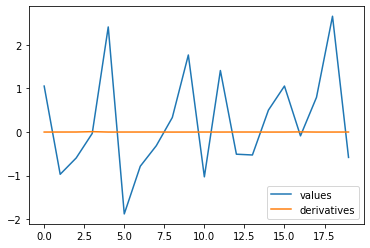

The input is [ 1.054516   -0.9692889  -0.59460217 -0.0318858   2.410932   -1.8784496
 -0.7847697  -0.3137085   0.33370885  1.767703   -1.0277647   1.4111717
 -0.5084972  -0.5263776   0.5031503   1.0549793  -0.0874074   0.79581654
  2.656559   -0.5822907 ]
The jax.jvp result is  [-0.000268    0.00029156  0.00047529  0.00886308 -0.00011722  0.00015045
  0.00036011  0.00090086 -0.00084686 -0.00015987  0.00027497 -0.00020026
  0.00055577  0.00053689 -0.00056167 -0.00026788  0.00323321 -0.00035511
 -0.00010638  0.00048534]


In [ ]:
jvp_driver(10)

### 5. Reverse mode using: `jax.jacvjp()`
1. https://jax.readthedocs.io/en/latest/jax.html#jax.vjp
2. Uses reverse mode, returns a function that computes the adjoints for a funtion $R^n \rightarrow R^m$.
3. You must provide the input value.
3. You can provide a seed. For reverse mode the shape of the seed must match the primal output. We have chosen `0.5`. 
5. Exercise: See how values change as the seed changes.


In [ ]:
def vjp_driver(n):    
    """
    Input: n array length
    Output: Result of Rosenbrock's banana function
    """
    #create a random array
    key = random.PRNGKey(0)
    val = random.normal(key, (n,), jnp.float64)

    #create a array of constant elememnts
    #val = jnp.full(n, 0.5)

    #jax.vjp must be called once for each input value
    primals, fun_vjp = jax.vjp(fun, val)
    
    #compute the derivatives by calling fun_vjp() for the seed value
    seed = 1.0
    adj_val = fun_vjp(seed)

    plot_vals(val,grad=jnp.stack(adj_val[0]))
    print("The input is", val)
    print("The jax.vjp result is ", adj_val[0])

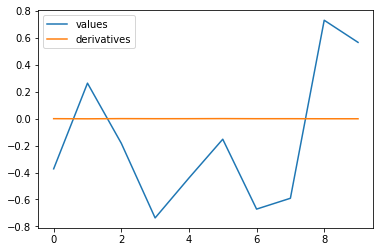

The input is [-0.372111    0.2642311  -0.18252774 -0.7368198  -0.44030386 -0.15214427
 -0.6713536  -0.59086424  0.73168874  0.56730247]
The jax.vjp result is  [ 0.00039198 -0.00055201  0.00079911  0.00019796  0.00033127  0.00095869
  0.00021726  0.00024686 -0.00019935 -0.00025711]


In [ ]:
vjp_driver(10)